<a href="https://colab.research.google.com/github/liuxiaoxuan97/data-science-hw-/blob/master/263_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0.4, -0.08, 0.022, -0.018]


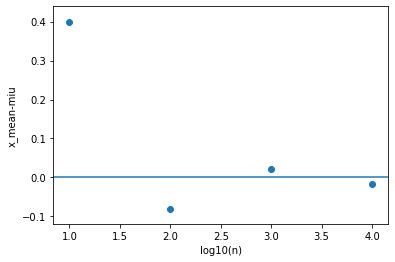

In [0]:
##Question 1
import numpy as np
%matplotlib inline
np.random.seed(263)
N=10000
a=lambda x: 1 if x>0.5 else -1
miu=0
def genran(nl):
    x_bar=[]
    var=[]
    for n in nl:
        li=np.array([i for i in map(a,np.random.uniform(0,1,n))])
        x_bar.append(li.mean())
        var.append(li.std())
    return x_bar,var
xb1,var1=genran([10,100,1000,10000])
print(xb1)
logn1=[np.log10(n) for n in [10,100,1000,10000]]
import matplotlib.pyplot as plt
plt.scatter(logn1,xb1)
plt.axhline(y=0,ls='-')
plt.xlabel('log10(n)')
plt.ylabel('x_mean-miu')
plt.show()


**Answer Question 1(a)**
From the plot, I find that as n goes to infinite, the deviation $\bar{X_n}^{(1)}-\mu$ converges to zero. The further along I go in the sequence, that's to say, the more samples I have, the probability that the sequence of average deviates from true population mean ($\mu$=0) becomes very small.




**Question 1(b)**

In [0]:

def genran1(nl,e):
    x_barn=[]
    varn=[]
    li1=[]
    b=lambda x: 1 if x>e else 0
    for i in range(N):
        li1+=genran([nl])[0]
    x_barn.append(np.array([i for i in map(b,li1)]).mean())
        #xbarn.append(li1.mean())
    varn.append(np.array([i for i in map(b,li1)]).std())
    return x_barn,varn   

x1=[]
x2=[]
x3=[]
nl=[10,100,1000,10000]
for n in nl:
    x1.append(genran1([n],0.5)[0])
    x2.append(genran1([n],0.1)[0])
    x3.append(genran1([n],0.05)[0])


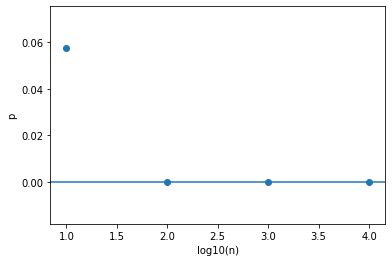

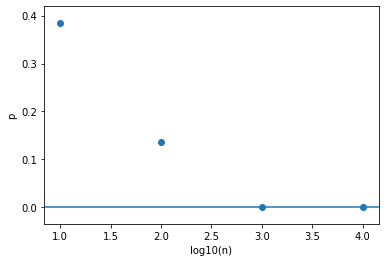

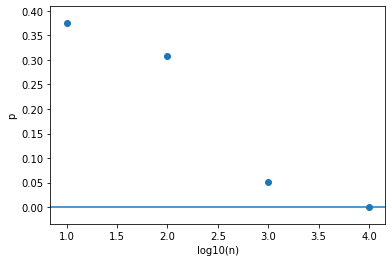

In [0]:
dic1={'x1':0.5,'x2':0.1,'x3':0.05}
for x in [x1,x2,x3]:
  plt.scatter(logn1,x)
  plt.axhline(y=0,ls='-')
  plt.xlabel('log10(n)')
  plt.ylabel('p')
  #plt.title('epsilon={0}'.format(dic1['x']))
  plt.show() 

**Answer：**
From the plots we can see that, when the number of dataset of 10000, which can be viewed as a large dataset, $\frac{1}{N}\sum_{i=1}^{N}\mathbb{I{{\left|\bar{X_n}^{(i)}-\mu \right|}>\epsilon}}$ converges to zero, for all $\epsilon=0.5,0.1,0.05$. The result is in align with the definition of Law of Large Number: The further along you go in the sequence/the more samples you have, the probability that your sequence deviates from X becomes very small. Let $X_{1},...,X_n$ be independent and identically distributed random variables with $\mathbb{E}(X_i)=\mu$ then $\bar{X_n}$ converges to $\mu$ in probability.

**Question1(c)**

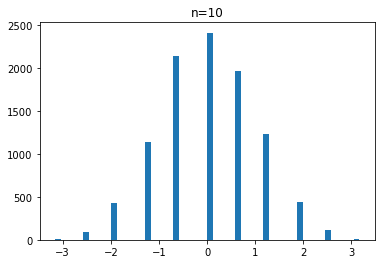

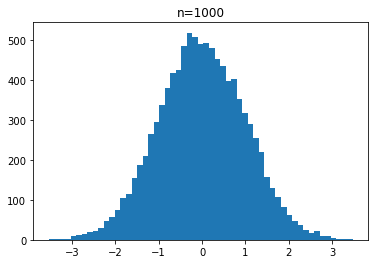

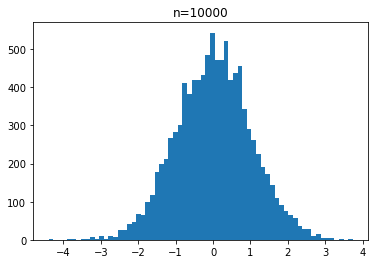

In [0]:
#Question 3
N=10000
def genran2(nl):
    x_barn=[]
    varn=[]
    li1=[]
    #b=lambda x: 1 if x>e else 0
    for i in range(N):
        li1.append((genran([nl])[0][0]-0)*np.sqrt(nl))
    plt.hist(li1, bins='auto')
    plt.title('n={0}'.format(nl))
    plt.show()
    #return li1
    #return li1
genran2(10)
genran2(1000)
genran2(10000)

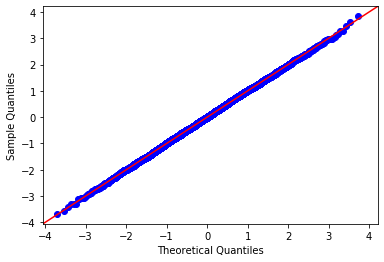

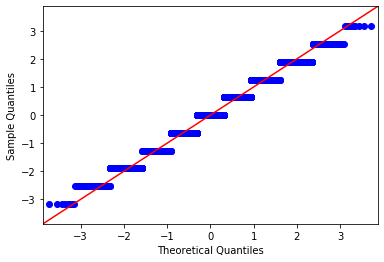

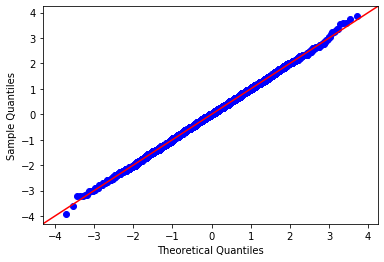

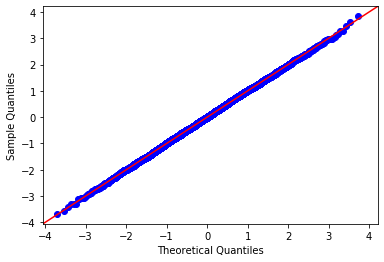

In [0]:
import statsmodels.api as sm
def genran3(nl):
    x_barn=[]
    varn=[]
    li1=[]
    #b=lambda x: 1 if x>e else 0
    for i in range(N):
        li1.append((genran([nl])[0][0]-0)*np.sqrt(nl))
    return li1
sm.qqplot(np.array(genran3(10)),line='45')
sm.qqplot(np.array(genran3(1000)),line='45')
sm.qqplot(np.array(genran3(10000)),line='45')

**Answer to Question1(c)**
The histograms for 10 is not clear because the limit number of data points, but as n goes larger: 1000 and 10000, the histogram becomes more like normal distribution's histogram. Also, the QQ-plot when n=1000 and 10000 are well aligned with the standard line. Therefore, these plots illustrates the Central Limit Theorem. According to the definition of Central Limit Theorem--Let $X_1,...,X_n$ be independent and identically distributed random variables with finite mean $E(X_i)=\mu$ and finite variance $Var(X_i)=\sigma^2$. Then $\sqrt{n}(\bar{X_n}-\mu)/\sigma$ converges to normal distribution $N(0,1)$ for large n in distribution. Here, the definition of converge in distribution i: The further along you go in the sequence/the more samples you have, the better your sequence's distribution is approximated by the distribution of X. The theorem holds no matter what the actual distribution of X is. For our task in this problem, the orginal distribution is based on uniform distribution and an indicator function, so the mean and variance of the original one is finite. And the N=1000 or 10000, which is large enough, so we can say that, as the central limit theorem holds in this situation.

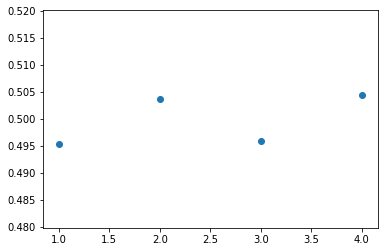

In [6]:
# question 4
import numpy as np
%matplotlib inline
N=10000
Y=np.random.randn(10000)
def genran4(nl,e):
    x_barn=[]
    
    li1=[]
    b=lambda x: 1 if x>e else 0
    for i in range(N):
        li1.append((genran([nl])[0][0]-0)*np.sqrt(nl)-Y[i])
    x_barn.append(np.array([i for i in map(b,li1)]).mean())
        #xbarn.append(li1.mean())
    #varn.append(np.array([i for i in map(b,li1)]).std())
    return x_barn
li2=[]
for n in [10,100,1000,10000]:
    li2.append(genran4(n,0.001))
plt.scatter(logn1,li2)
plt.show()


**Answer to Question 1(d)**
This plot illustrates the difference between convergence in probability and convergence in distribution. The probbability $\frac{1}{N}\sum_{i=1}^{N}\mathbb{I({{\left|\sqrt{n}(\bar{X_n}^{(i)}-\mu )/\sigma-Y_i\right|}>\epsilon}})$ doesn't converges to zero as n goes to infinity(from 10 to 10000). However, if it converges in probability, the formula should be in the form of converges to zero as n goes to infinity. So, although $\sqrt{n}(\bar{X_n}^{(i)}-\mu )/\sigma$ converges in distribution to normal distribution according to the CLT when n goes to infinity, it doesn't imply converge in distribution. Central Limit Theory(CLT) implies LLN in the sense that $\sqrt{n}(X_n−\mu)/σ\to^{d}Y$ for $Y∼N(0,1)$ implies $X_n\to^{p}\mu$, while it does not imply that $\sqrt{n}(X_n−μ)/σ\to^{p}Y$. When we say converge in distribution does not imply converge in probability, it means $X_n\to^{d}Y$ does not imply $X_n\to^{P}Y$.To illustrate, let $Z_n=\sqrt{n}(\bar{X_n}^{(i)}-\mu )/\sigma$, since $Y_i$ are generated independently from a standard normal distribution, but there is no random variable Y to gurantee that $Z_n\to^{p} Y$. So, $P(\left|Z_n-Z_{n+1}\right|>2\epsilon)\le P(\left| Z_n-Y \right| >\epsilon)+P(\left|Z_{n+1}-Y\right|>\epsilon)$. Let's prove if using contradictory case, if LLN, and the converge in probability holds, the right-hand side of the inequation should be zero as n goes to infinity, then  $P(\left|Z_n-Z_{n+1}\right|>2\epsilon)\le 0$, which is impossible, so the $Z_n$ doesn't converge to Y in probability.


**Question 2(a)**

Ans: As shown from the histogram below, all the scores are almost around 7.57-7.58 and 10 out of 19 are about 7.5795. The distribution is not like normal distribution.

In [9]:
# if using colab, we need to use the following code to load data
#from google.colab import files
#uploaded = files.upload()


Saving ratings.dat to ratings.dat


In [13]:
#import io
#data = io.BytesIO(uploaded['ratings.dat'])
#import pandas as pd  
#f = pd.read_csv(data,header=None)
#f.head()

,0,1,2
0,56669,39491,6
1,56919,8035,10
2,108853,102321,10
3,116784,52568,2
4,132748,220878,10


In [0]:
import pandas as pd
import requests
##Question 1

ratings=pd.read_csv("C:/Users/xiaoxuanliu/Downloads/ratings.dat",header=None,names=['UserID','ProfileID','Rating'])
ratings['ProfileID'].astype(int)
ratings.head(3)
def weightedrank(ratings,ProfileID):
    r=ratings[ratings['ProfileID']==ProfileID]['Rating'].mean()
    v=ratings[ratings['ProfileID']==ProfileID].shape[0]
    m=4182 
    c=ratings['Rating'].mean()
    WR= (v/(v+m))*r+ (m/(v+m))*c
    return WR
## UserID 100
user100=ratings[ratings['UserID']==100]
plist=user100['ProfileID'].unique()
dic={}
for i in plist:
    dic[i]=weightedrank(user100,i)
dic
#user100.apply(weightedrank(173852))


(array([ 3.,  0.,  0.,  0.,  1.,  2.,  0.,  3.,  0., 10.]),
 array([7.57737459, 7.57758974, 7.5778049 , 7.57802006, 7.57823521,
        7.57845037, 7.57866553, 7.57888068, 7.57909584, 7.579311  ,
        7.57952615]),
 <a list of 10 Patch objects>)

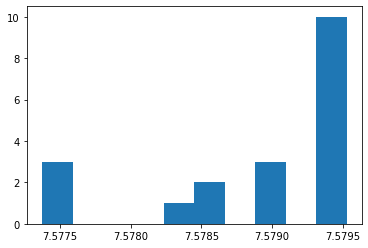

In [0]:
import matplotlib.pyplot as plt
plt.hist(dic.values())


**Question 2(b)**

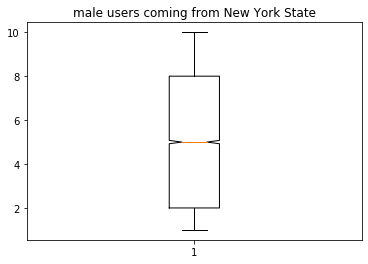

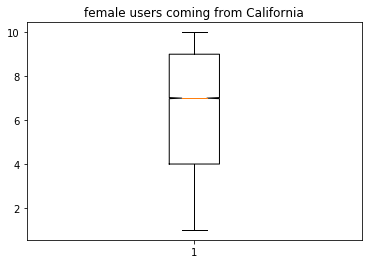

In [0]:
##question 2
user=pd.read_csv("C:/Users/xiaoxuanliu/Downloads/users.csv",header=0)

ny=['NEW YORK','new york','NY','ny','nY']
ca=['CA','ca','California','Ca','calif.','CA.','Ca.','calif','CALIFORNIA','cA','ca.','Calif.','caifornia']
mny=user[(user['State'].isin(ny)) & (user['Gender']=='M')]
fca=user[(user['State'].isin(ca)) & (user['Gender']=='F')]
mny=pd.merge(mny,ratings,left_on='UserID',right_on='UserID')
fca=pd.merge(fca,ratings,left_on='UserID',right_on='UserID')
plt.boxplot(mny['Rating'],notch=True)
plt.title('male users coming from New York State')
plt.show()
plt.boxplot(fca['Rating'],notch=True)
plt.title('female users coming from California')
plt.show()


In [0]:
user.head(4)

,UserID,Gender,State,City,Employer,Occupation,Ratedate
0,1,F,OHIO,WESTLAKE,NONE,RN/RETIRED,3/19/2008 16:59
1,2,F,MN,New Ulm,None,Retired,3/19/2008 16:59
2,3,U,Nevada,Las Vegas,Retired,None,3/19/2008 16:59
3,4,F,mn,mpls,coldwell banker burnet,sales,3/19/2008 16:59


**Question 2(c)**

Ans: R-squared is a statistical measure of how close the data are to the fitted regression line, the percentage of the response variable variation that is explained by a linear model.The R2 is 0.6295, which means that the model explains 62.95% of the variability of the response data around its mean. coefficient of intercept is -2.12705, which means the expected mean value of Y is -2.12705 when both use_rating and profile ratings are 0. The coefficient of user_rating is 0.445989, which means keeping other variables as the same, one unit increase in average rating given by the user will lead to 0.446 unit
increase in mean value of a user rating for a profile; coefficient of profile_rating is 0.912157, which means one unit increase in average rating given by the profile will lead to 0.912 unit increase in mean value of user rating for a profile.

In [0]:
# Question 3
a1=ratings.groupby(['UserID'])['Rating'].agg(np.mean)

a2=pd.merge(a1,ratings,on='UserID')
a2=a2.rename(columns={"Rating_x": "ur", "Rating_y": "r"})
#a3=pd.rename()
b1=ratings.groupby(['ProfileID'])['Rating'].agg(np.mean)
a3=pd.merge(a2,b1,on='ProfileID')
#a2[a2['UserID']==1]
import statsmodels.formula.api as sm1
a3=a3.rename(columns={"Rating": "pr"})
lm = sm1.ols(formula= 'r~ur+pr',data=a3).fit()
lm.params
#poly3_pred = deg3_lm.predict(listest[varPred])
#average rating givenby the user and the average rating of the profile from all users as predictors

Intercept   -2.127053
ur           0.445989
pr           0.912157
dtype: float64

In [0]:
par=lm.params
from sklearn.metrics import r2_score
pred=lm.predict(a3[['ur','pr']])
r2=r2_score(a3['r'],pred)
print('The R2 is {0}, the coefficient of intercept is {1}, the coefficient of user_rating is {2},coefficient of profile_rating is {3}.\n'.
     format(r2,par[0],par[1],par[2]))
print('Analysis the result: keeping other variables as the same, one unit increase in average rating given by the user will lead to 0.446 unit\
increase in a user rating for a profile;  keeping other variables as the same, one unit increase in average rating given by the profile will lead to 0.912 unit\
increase in a user rating for a profile.')

The R2 is 0.6294794932241576, the coefficient of intercept is -2.1270532209555624, the coefficient of user_rating is 0.445988567828736,coefficient of profile_rating is 0.912157092437714.

Analysis the result: keeping other variables as the same, one unit increase in average rating given by the user will lead to 0.446 unitincrease in a user rating for a profile;  keeping other variables as the same, one unit increase in average rating given by the profile will lead to 0.912 unitincrease in a user rating for a profile.


**Question3**

**Answer for part c**:

 First, we generate 100 random numbers from uniform (0,1) distribution, and user inverse function to get the random variables, then calculate the maximum likelihood estimate of alpha using each dataset and construct the 95% CI based on asymptotically normal distribution of MLE. Next, I replicate the same procedure on 10000 generated datasets and calculate CI respectively
and then summarize the frequency of the CI’s that cover the true α which equals to the probability of generated CIs that covers the ture parameter
of interest, the probability is 95.36%, which is larger than 95%, so the effectiveness of CI when n=100 is verified.


In [7]:
#Part 3
import numpy as np
n=100
alpha=3
f1=lambda x: np.sqrt(1/(1-x))
def inCI(n):
    ss=np.random.uniform(0,1,100)
    x=[i for i in map(f1,ss)]
    a_est=(n/np.sum(np.log(x)))+1
    low=a_est-1.96*(a_est-1)/np.sqrt(n)
    up=a_est+1.96*(a_est-1)/np.sqrt(n)
    return (alpha>low) & (alpha<up)
CI=[]
for i in range(10000):
    CI.append(inCI(100))
np.sum(CI)/len(CI)    

0.9536

In [15]:
np.sum(CI)/len(CI)    

0.9536

In [0]:
print('Analysis for question 3 (c):\n First, we generate 100 random numbers from uniform (0,1) distribution, and user inverse function to \
get the random variables, then calculate the maximum likelihood estimate of alpha using each dataset and construct the 95% CI based on\
asymptotically normal distribution of MLE. Next, I replicate the same procedure on 10000 generated datasets and calculate CI respectively\
and then summarize the frequency of the CI’s that cover the true α which equals to the probability of generated CIs that covers the ture parameter\
of interest, the probability is {0}, which is larger than 95%, so the effectiveness of CI when n=100 is verified'.format(np.sum(CI)/len(CI)))

Analysis for question 3 (c):
 First, we generate 100 random numbers from uniform (0,1) distribution, and user inverse function to get the random variables, then calculate the maximum likelihood estimate of alpha using each dataset and construct the 95% CI based onasymptotically normal distribution of MLE. Next, I replicate the same procedure on 10000 generated datasets and calculate CI respectivelyand then summarize the frequency of the CI’s that cover the true α which equals to the probability of generated CIs that covers the ture parameterof interest, the probability is 0.9515, which is larger than 95%, so the effectiveness of CI when n=100 is verified
